<a href="https://colab.research.google.com/github/13apoorva/ML_DL_MINI_PROJECTS/blob/main/Goa_hotel_sentiment_analysis/Goa_Hotel_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED LIBRARIES**


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep
import re
import nltk
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**SCRAPPED REVIEWER AND RATING GOA HOTELS DATA FROM BOOKING.COM USING THIS CODE AND CREATED A CSV FILE**

In [ ]:
#plc_nm=[]
#plc_re=[]
#plc_rt=[]
#for i in range(25,551,25):
  #url="https://www.booking.com/searchresults.en-gb.html?label=msn-TF7fYzyNdGSbuXzNJiosWA-79852079958251%3Atikwd-16681414380%3Aloc-90%3Aneo%3Amte%3Alp148990%3Adec%3Aqsgoibibo&aid=393655&ss=goa&ssne=Kh%C4%81tu&ssne_untouched=Kh%C4%81tu&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=4127&dest_type=region&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=4b921a87c300017b&ac_meta=GhA0YjkyMWE4N2MzMDAwMTdiIAAoATICZW46A2dvYUAASgBQAA%3D%3D&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset="+str(i)
  #response = requests.get(url)
  #htmlcontent = response.content

  #soup = BeautifulSoup(htmlcontent,"html.parser")
  #Hotel_Name=soup.find_all('div',attrs={'class':'fcab3ed991 a23c043802'})
  #Review=soup.find_all('div',attrs={'class':'b5cd09854e f0d4d6a2f5 e46e88563a'})
  #Rating=soup.find_all('div',attrs={'class':'b5cd09854e d10a6220b4'})
  #print(len(Hotel_Name))
  #for i in Hotel_Name:
    #plc_nm.append(i.text)
  #for i in Review:
    #plc_re.append(i.text)
  #for i in Rating:
    #plc_rt.append(i.text)


25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25


In [ ]:
#for i in plc_rt:
  #print(i)


**CREATED DATAFRAME AND CONVERTED INTO A CSV FILE** 

In [ ]:
#data={"Hotel_Name": plc_nm,"Review": plc_re,"Rating":plc_rt}
#df=pd.DataFrame(data)

In [ ]:
#df.to_csv('GOA_NLP.csv')

In [ ]:
df=pd.read_csv("/content/GOA_NLP.csv")

In [ ]:
df

,Hotel_Name,Review,Rating
0,JM Vista Suites,Very good,8.5
1,Kay's By The Sea,Very good,8.5
2,Zulu Land cottages - near Curlies beach shack ...,Good,7.8
3,Casa Aluizio,Good,7.9
4,Siolim Suites,Superb,9.2
...,...,...,...
545,Aarju Luxurious Wave,Fabulous,8.9
546,Aaria Hills,Fabulous,8.8
547,juSTa Morjim Beach Resort Goa - 80 Steps from ...,Good,7.8
548,Nilaya Hermitage,Very good,8.0


In [ ]:
df.head(10)

,Hotel_Name,Review,Rating
0,JM Vista Suites,Very good,8.5
1,Kay's By The Sea,Very good,8.5
2,Zulu Land cottages - near Curlies beach shack ...,Good,7.8
3,Casa Aluizio,Good,7.9
4,Siolim Suites,Superb,9.2
5,The Foothills - A Boutique Hotel,Superb,9.0
6,Nirvana Hill Resort,Very good,8.5
7,"Whoopers Boutique Hotel, Anjuna",Exceptional,9.7
8,U.R.D.Ki Hostel,Exceptional,9.5
9,Godwin Goa,Good,7.7


In [ ]:
df.isnull().sum()

Hotel_Name    0
Review        0
Rating        0
dtype: int64

In [ ]:
df["Rating"].value_counts()

8.5    88
7.8    66
7.7    44
8.2    44
8.1    44
8.0    44
7.9    22
9.2    22
9.0    22
9.7    22
9.5    22
7.4    22
8.4    22
9.1    22
8.9    22
8.8    22
Name: Rating, dtype: int64

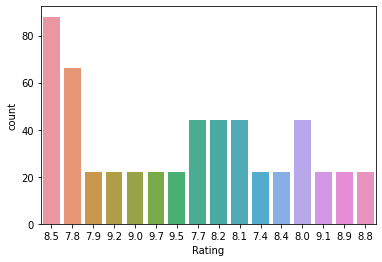

In [ ]:
sns.countplot(x='Rating',data=df)

Text(0.5, 1.0, 'Distribution of different Sentiments')

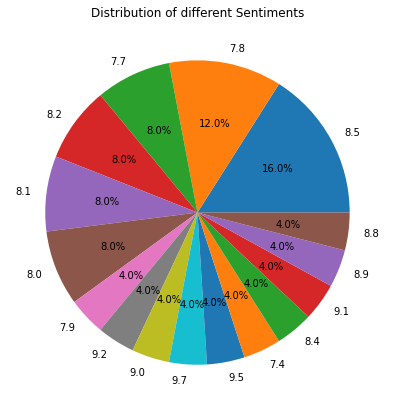

In [ ]:
fig=plt.figure(figsize=(7,7))
tags=df['Rating'].value_counts()
tags.plot(kind='pie',autopct='%1.1f%%',label='')
plt.title("Distribution of different Sentiments")

In [ ]:
df_neg = df.loc[df["Rating"]<=str(8.0)]
df_neg=df_neg.reset_index(drop=True)


In [ ]:
df_ten=df.loc[df["Rating"]>=str(9.5)]
df_ten=df_ten.reset_index(drop=True)

In [ ]:
print(len(df_ten))

44


In [ ]:
df_pos = df.loc[df["Rating"]>str(8.0)]
df_pos=df_pos.reset_index(drop=True)


In [ ]:
print(len(df_pos))

352


In [ ]:
len(df_neg)

198

In [ ]:
len(df_pos)

352

In [ ]:
df_all=pd.concat([df_neg,df_pos],axis=0)
df_all=df_all.reset_index(drop=True)

In [ ]:
df_all.shape

(550, 3)

In [ ]:
df_all['Sentiment']=np.where(df_all["Rating"]>=str(8.5),"Positive","Negative")

In [ ]:
df_all.tail()

,Hotel_Name,Review,Rating,Sentiment
545,klase homep,Very good,8.4,Negative
546,"Storii By ITC Hotels, Shanti Morada Goa",Superb,9.1,Positive
547,Aarju Luxurious Wave,Fabulous,8.9,Positive
548,Aaria Hills,Fabulous,8.8,Positive
549,Aaria Residency,Very good,8.5,Positive


In [ ]:
df_all=df_all.sample(frac=1)
df_all=df_all.reset_index(drop=True)

In [ ]:
df_all.head(10)

,Hotel_Name,Review,Rating,Sentiment
0,Aaria Hills,Fabulous,8.8,Positive
1,Cosmique Clarks Inn Suites Goa,Good,7.7,Negative
2,Nirvana Hill Resort,Very good,8.5,Positive
3,Aaria Residency,Very good,8.5,Positive
4,"Storii By ITC Hotels, Shanti Morada Goa",Superb,9.1,Positive
5,"TATA Rio De Goa - Resort style apt,6 KM from A...",Very good,8.1,Negative
6,Nilaya Hermitage,Very good,8.0,Negative
7,"TATA Rio De Goa - Resort style apt,6 KM from A...",Very good,8.1,Negative
8,Aarju Luxurious Wave,Fabulous,8.9,Positive
9,"Whoopers Boutique Hotel, Anjuna",Exceptional,9.7,Positive


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_all.Review,df_all.Sentiment)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_vec=v.fit_transform(x_train)
x_test_vec=v.transform(x_test)

In [ ]:
from sklearn import svm

In [ ]:
clf_svm=svm.SVC(kernel="linear")
clf_svm.fit(x_train_vec,y_train)

SVC(kernel='linear')

In [ ]:
clf_svm.score(x_test_vec,y_test)

0.8260869565217391

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,clf_svm.predict(x_test_vec),average=None)

array([0.85882353, 0.77358491])

In [ ]:
rev=["Very Nice Place,loved it"]
rev_vec=v.transform(rev)
clf_svm.predict(rev_vec)

array(['Positive'], dtype=object)

In [ ]:
rev=["Not that good"]
rev_vec=v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)